<a href="https://colab.research.google.com/github/monobinab-source/ai-ml/blob/main/predict_smoker_alive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('sample_data/Whickham.txt')

In [6]:
df_encoded = pd.get_dummies(df, drop_first=True) # to convert all the categorical variables into Boolean values. This creates a new colummn as smoker_Yes.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded[["smoker_Yes", "age"]], df["outcome"], test_size=0.3, random_state=42)

In [4]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy')

In [8]:
df_encoded.head()

,age,outcome_Dead,smoker_Yes
0,23,False,True
1,18,False,True
2,71,True,True
3,67,False,False
4,64,False,False


In [25]:
decision_tree_model = decision_tree_model.fit(X_train, y_train)

In [26]:
predictions = decision_tree_model.predict(X_train)

In [28]:
accuracy_score(predictions, y_train)

0.8563656147986942

The training accuracy is 85.6%


In [29]:
test_predictions = decision_tree_model.predict(X_test)
accuracy_score(test_predictions, y_test)

0.8658227848101265

Test accuracy is 86.5%

[Text(0.6186789772727272, 0.9583333333333334, 'age <= 58.5\nentropy = 0.856\nsamples = 919\nvalue = [661, 258]\nclass = Alive'),
 Text(0.33508522727272727, 0.875, 'age <= 41.5\nentropy = 0.497\nsamples = 651\nvalue = [580, 71]\nclass = Alive'),
 Text(0.47688210227272726, 0.9166666666666667, 'True  '),
 Text(0.12386363636363637, 0.7916666666666666, 'age <= 34.5\nentropy = 0.204\nsamples = 375\nvalue = [363, 12]\nclass = Alive'),
 Text(0.04318181818181818, 0.7083333333333334, 'age <= 18.5\nentropy = 0.148\nsamples = 284\nvalue = [278, 6]\nclass = Alive'),
 Text(0.01818181818181818, 0.625, 'smoker_Yes <= 0.5\nentropy = 0.353\nsamples = 15\nvalue = [14, 1]\nclass = Alive'),
 Text(0.00909090909090909, 0.5416666666666666, 'entropy = 0.65\nsamples = 6\nvalue = [5, 1]\nclass = Alive'),
 Text(0.02727272727272727, 0.5416666666666666, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = Alive'),
 Text(0.06818181818181818, 0.625, 'age <= 26.5\nentropy = 0.133\nsamples = 269\nvalue = [264, 5]\nclas

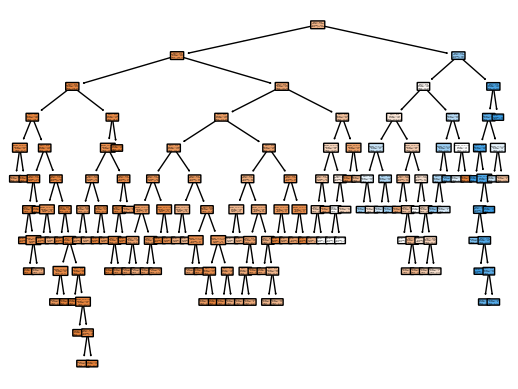

In [47]:
tree.plot_tree(decision_tree_model, feature_names = ["smoker_Yes", "age"], class_names=["Alive", "Dead"], rounded = True, filled = True)

Now lets use GridSearch method to find best hyperparameters.

In [37]:
tree_param = {
    'criterion': ['entropy'],
    'max_depth': range(1, 10),
    'min_samples_leaf': range(1, 10)
}

In [38]:
clf = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)

In [39]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10)})

In [40]:
best_params = clf.best_params_

In [41]:
print(best_params)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}


In [43]:
train_predictions_clf = clf.predict(X_train)

In [44]:
accuracy_score(train_predictions_clf, y_train)

0.8476605005440696

The training accuracy using the is 84.7%

In [45]:
test_predictions_clf = clf.predict(X_test)

In [46]:
accuracy_score(test_predictions_clf, y_test)

0.8632911392405064

Best Test Data Prediction Accuracy using Grid Search CV is 86.3%

In [50]:
pip install scikit-learn scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 8.9 MB/s eta 0:00:00


In [53]:

from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from sklearn.tree import DecisionTreeClassifier

# Define search space
search_space = {
    'max_depth': Integer(1, 20),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'criterion': Categorical(['gini', 'entropy']),
    'max_features': Categorical(['sqrt', 'log2', None])
}

# Set up BayesSearchCV
opt = BayesSearchCV(
    estimator=DecisionTreeClassifier(),
    search_spaces=search_space,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42
)



In [54]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=DecisionTreeClassifier(), random_state=42,
              scoring='accuracy',
              search_spaces={'criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'max_depth': Integer(low=1, high=20, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('sqrt', 'log2', None), prior=None),
                             'min_samples_leaf': Integer(low=1, high=20, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize')})

In [56]:
best_params = opt.best_params_
print(best_params)

OrderedDict([('criterion', 'gini'), ('max_depth', 12), ('max_features', 'sqrt'), ('min_samples_leaf', 20), ('min_samples_split', 4)])


In [58]:
best_score = opt.best_score_
print(best_score)

0.8444226657163222


In [59]:
print(f"Best hyperparameters found: {best_params}")

print(f"Best cross-validation accuracy: {best_score}")

Best hyperparameters found: OrderedDict([('criterion', 'gini'), ('max_depth', 12), ('max_features', 'sqrt'), ('min_samples_leaf', 20), ('min_samples_split', 4)])
Best cross-validation accuracy: 0.8444226657163222


In [62]:
# Evaluate the best model on the test set

opt_best_model = opt.best_estimator_

In [63]:
opt_y_pred = best_model.predict(X_test)

opt_test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {opt_test_accuracy}")


Test set accuracy: 0.8708860759493671


In [65]:
print("Best Test Accuracy using Bayesian Optimization is: ", test_accuracy)

Best Test Accuracy using Bayesian Optimization is:  0.8708860759493671
